### Import Modules, Change Directory, Set Variables

In [1]:
import_location = '/Users/johnmccloskey/Desktop/jowilder_data'
# import_name = '12172019 jowidler assessment 4.tsv'
export_location = '../jowilder_graphs'

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from datetime import date
import numpy as np

In [3]:
files = os.listdir(import_location)
print(f"{'-'*5} {os.path.split(import_location)[-1]} {'-'*5}" )
print(*[f'{i}: {f}' for i, f in enumerate(files)][:10], sep='\n')

----- jowilder_data -----
0: 12182019 jowidler assessment 4.tsv
1: 12172019 jowidler.tsv
2: 12172019 jowidler assessment 4.tsv


In [4]:
import_n = 0

### Import

In [5]:
df = pd.read_csv(os.path.join(import_location,files[import_n]), sep='\t',index_col='sessionID')
print(df.shape)
df.head()

(259, 380)


,lvl0_EventCount,lvl0_count_clicks,lvl0_count_hovers,lvl0_avgTimePerTextBox,lvl0_time_in_level,lvl0_meaningful_action_count,lvl0_words_per_second,lvl0_count_notebook_uses,lvl0_avg_time_between_clicks,lvl1_EventCount,...,sess_avgTimePerWord,sess_avgTimePerTextBox,sess_stDevTimePerTextBox,sess_words_per_second,sess_count_notebook_uses,sess_avg_time_between_clicks,save_code,music,hq,fullscreen
sessionID,,,,,,,,,,,,,,,,,,,,,
19110000090781600,34,26.0,6.0,1.672167,63.535,3.0,3.970336,NaN,2.096680,30.0,...,0,16.005742,0,4.125283,8,161.139635,0,1,0,0
19110009114094480,21,18.0,1.0,1.839250,44.510,1.0,4.523686,NaN,1.195588,27.0,...,0,7.617183,0,4.731634,6,2.034186,donethework,1,0,0
19110012454548376,43,36.0,5.0,1.545500,73.820,4.0,6.184182,NaN,1.584343,114.0,...,0,7.371897,0,7.551905,11,1.610426,0,1,1,True
19110013234266620,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,4.979176,0,9.855149,6,1.309599,0,1,0,0
19110014392453668,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,6.194067,0,6.349095,1,1.576921,0,1,0,0


In [6]:
list(df.columns)

['lvl0_EventCount',
 'lvl0_count_clicks',
 'lvl0_count_hovers',
 'lvl0_avgTimePerTextBox',
 'lvl0_time_in_level',
 'lvl0_meaningful_action_count',
 'lvl0_words_per_second',
 'lvl0_count_notebook_uses',
 'lvl0_avg_time_between_clicks',
 'lvl1_EventCount',
 'lvl1_count_clicks',
 'lvl1_count_hovers',
 'lvl1_avgTimePerTextBox',
 'lvl1_time_in_level',
 'lvl1_meaningful_action_count',
 'lvl1_words_per_second',
 'lvl1_count_notebook_uses',
 'lvl1_avg_time_between_clicks',
 'lvl2_EventCount',
 'lvl2_count_clicks',
 'lvl2_count_hovers',
 'lvl2_avgTimePerTextBox',
 'lvl2_time_in_level',
 'lvl2_meaningful_action_count',
 'lvl2_words_per_second',
 'lvl2_count_notebook_uses',
 'lvl2_avg_time_between_clicks',
 'lvl3_EventCount',
 'lvl3_count_clicks',
 'lvl3_count_hovers',
 'lvl3_avgTimePerTextBox',
 'lvl3_time_in_level',
 'lvl3_meaningful_action_count',
 'lvl3_words_per_second',
 'lvl3_count_notebook_uses',
 'lvl3_avg_time_between_clicks',
 'lvl4_EventCount',
 'lvl4_count_clicks',
 'lvl4_count_hover

### Drop Rows with save_codes (continues) or not all wps's

In [7]:
df = df.drop(df[df['save_code'] != '0'].index)
print(df.shape)
df.head()

(230, 380)


,lvl0_EventCount,lvl0_count_clicks,lvl0_count_hovers,lvl0_avgTimePerTextBox,lvl0_time_in_level,lvl0_meaningful_action_count,lvl0_words_per_second,lvl0_count_notebook_uses,lvl0_avg_time_between_clicks,lvl1_EventCount,...,sess_avgTimePerWord,sess_avgTimePerTextBox,sess_stDevTimePerTextBox,sess_words_per_second,sess_count_notebook_uses,sess_avg_time_between_clicks,save_code,music,hq,fullscreen
sessionID,,,,,,,,,,,,,,,,,,,,,
19110000090781600,34,26.0,6.0,1.672167,63.535,3.0,3.970336,NaN,2.096680,30.0,...,0,16.005742,0,4.125283,8,161.139635,0,1,0,0
19110012454548376,43,36.0,5.0,1.545500,73.820,4.0,6.184182,NaN,1.584343,114.0,...,0,7.371897,0,7.551905,11,1.610426,0,1,1,True
19110013234266620,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,4.979176,0,9.855149,6,1.309599,0,1,0,0
19110014392453668,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,6.194067,0,6.349095,1,1.576921,0,1,0,0
19110016345644932,40,28.0,10.0,1.154714,200.637,4.0,5.354636,NaN,1.410185,34.0,...,0,5.708855,0,6.087589,2,2.864502,0,1,0,0


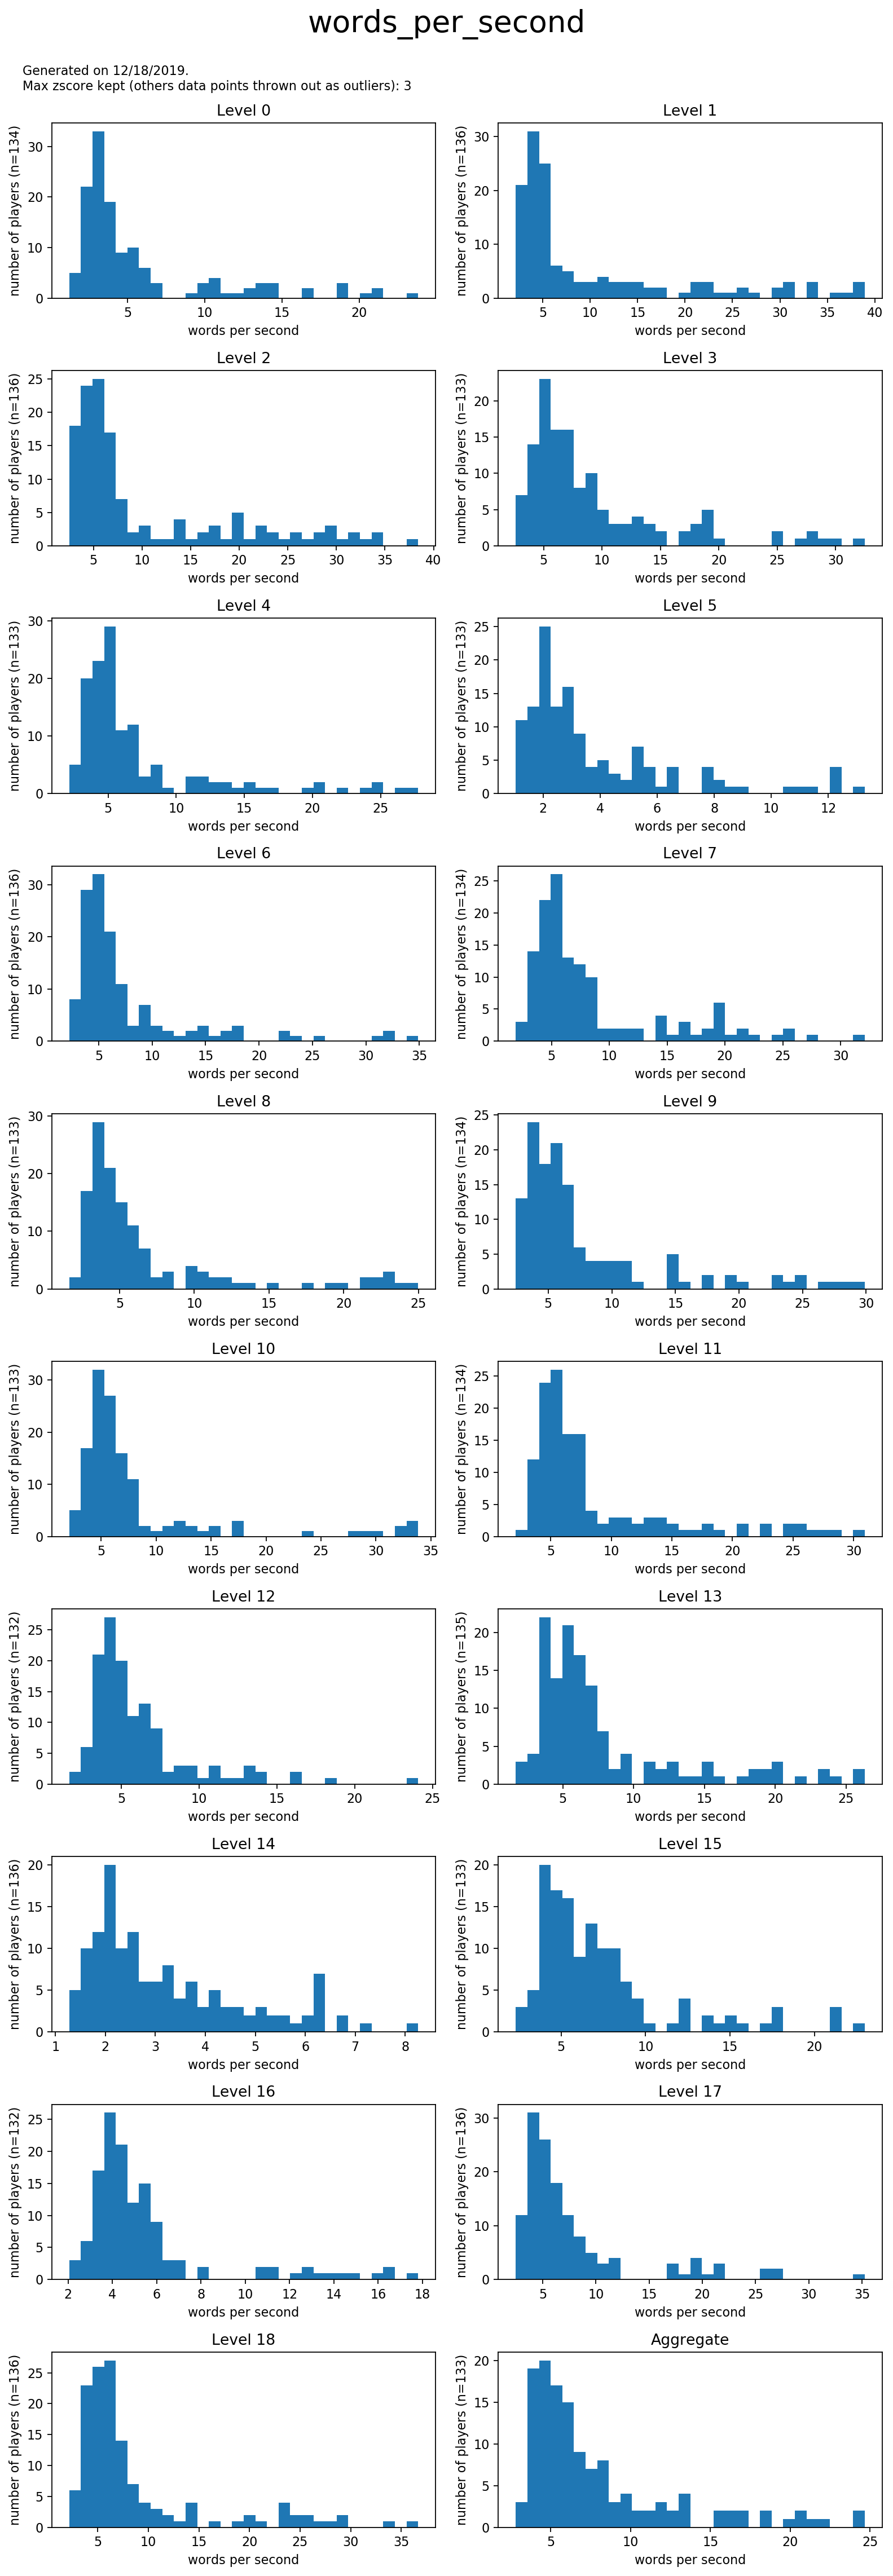

In [62]:
def output_level_histogram(fname_base, xlabel, **kwargs):
    output_file = os.path.join('jowilder_graphs', f'{date.today().strftime("%Y%m%d")}_{fname_base}.jpg')
    aggregate_fname = kwargs.get("aggregate_fname") or 'sess_'+fname_base
    xlim = kwargs.get("xlim") or None
    agg_xlim = kwargs.get("agg_xlim") or None
    zscore_cutoff = kwargs.get("zscore_cutoff") or 3
    max_x = kwargs.get("max_x") or None
    max_x_agg = kwargs.get("max_x_agg") or  None
    params = {"Max zscore kept (others data points thrown out as outliers)": zscore_cutoff,
            "Max X value kept - Level": max_x,
            "Max X value kept - Aggregate": max_x_agg,
            "Graph right cutoff - Level": xlim,
            "Graph right cutoff -  Aggregate": agg_xlim
             }


    
    feat_col_names = [f'lvl{lvl}_words_per_second' for lvl in range(19)] + [f'sess_words_per_second']
    hist_df = df.dropna(subset=feat_col_names)
    
    def get_histogram_level_feat(fname_base, lvl,max_x=None):
        get_histogram_feat(f'lvl{lvl}_{fname_base}',f'Level {lvl}',max_x=max_x)
                               
    def get_histogram_feat(fname,title,max_x=None):                           
        feat_df = hist_df[[fname]]
        if max_x:
            feat_df = feat_df[feat_df[fname] <= max_x]
        feat_df_no_outliers = feat_df[(np.abs(stats.zscore(feat_df)) < zscore_cutoff).all(axis=1)]
        feat_list = list((feat_df_no_outliers)[fname])
                               
        plt.xlabel(xlabel)
        plt.title(title)
        plt.ylabel(f'number of players (n={len(feat_list)})')
        plt.hist(feat_list, bins=30)

    fig = plt.figure(figsize=(10,30),dpi=160)
    fig.suptitle(fname_base,fontsize=24)
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in range(19):
        fig.add_subplot(10,2,i+1)
        get_histogram_level_feat(fname_base,i,max_x=max_x)
        if xlim:
            plt.xlim((0,xlim))
    fig.add_subplot(10,2,20)
    get_histogram_feat(aggregate_fname, 'Aggregate',max_x=max_x_agg)
    if agg_xlim:
        plt.xlim((0,agg_xlim))
                               
    plt.tight_layout(rect=[0,0.03,1,0.95])
    arg_string = "\n".join(f"{k}: {v}" for k,v in params.items() if v)
    fig.text(.03,.95,f'Generated on {date.today().strftime("%m/%d/%Y")}.\n{arg_string}')
    plt.show()
    fig.savefig(output_file)
                               
output_level_histogram('words_per_second', 'words per second')
    

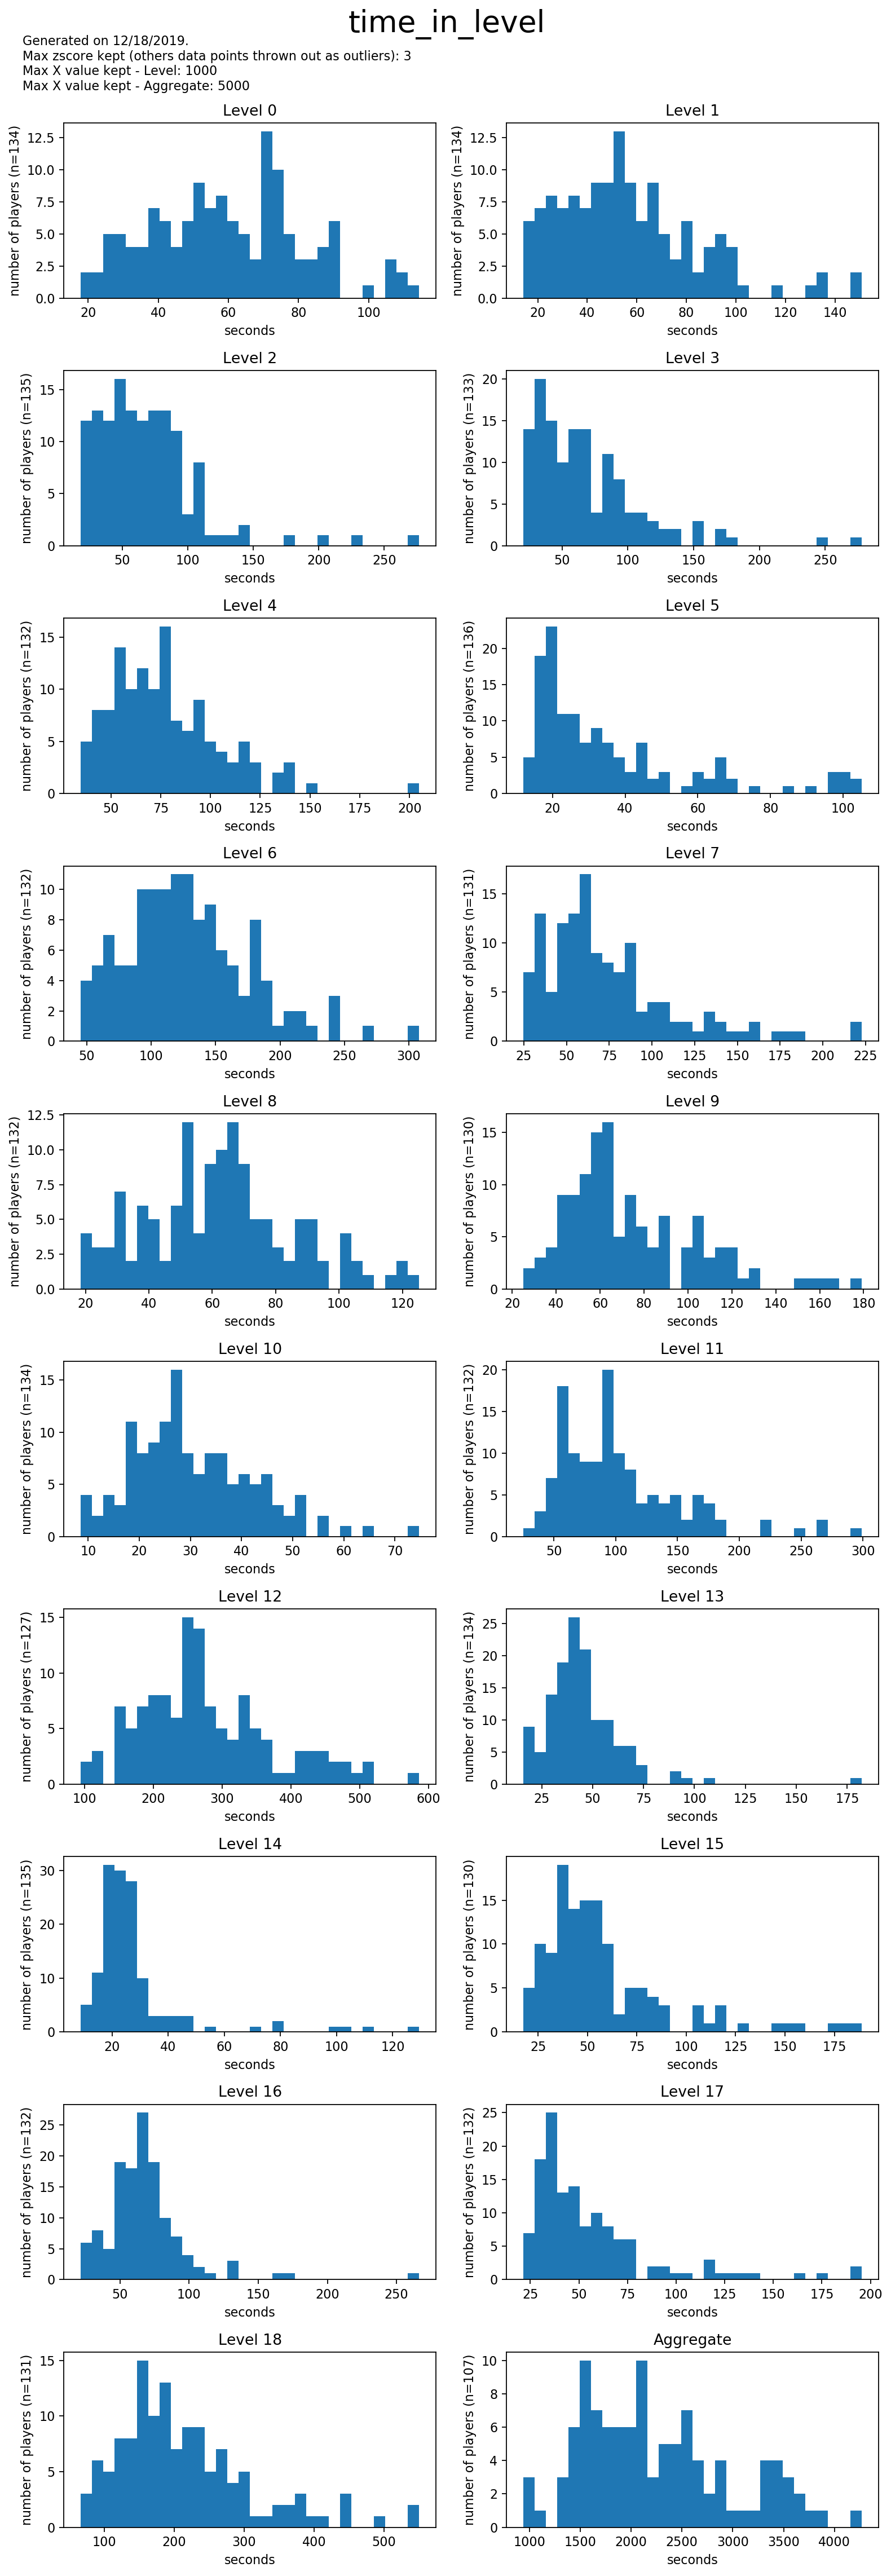

In [63]:
output_level_histogram('time_in_level','seconds',aggregate_fname='sessDuration',max_x=1000, max_x_agg=5000)

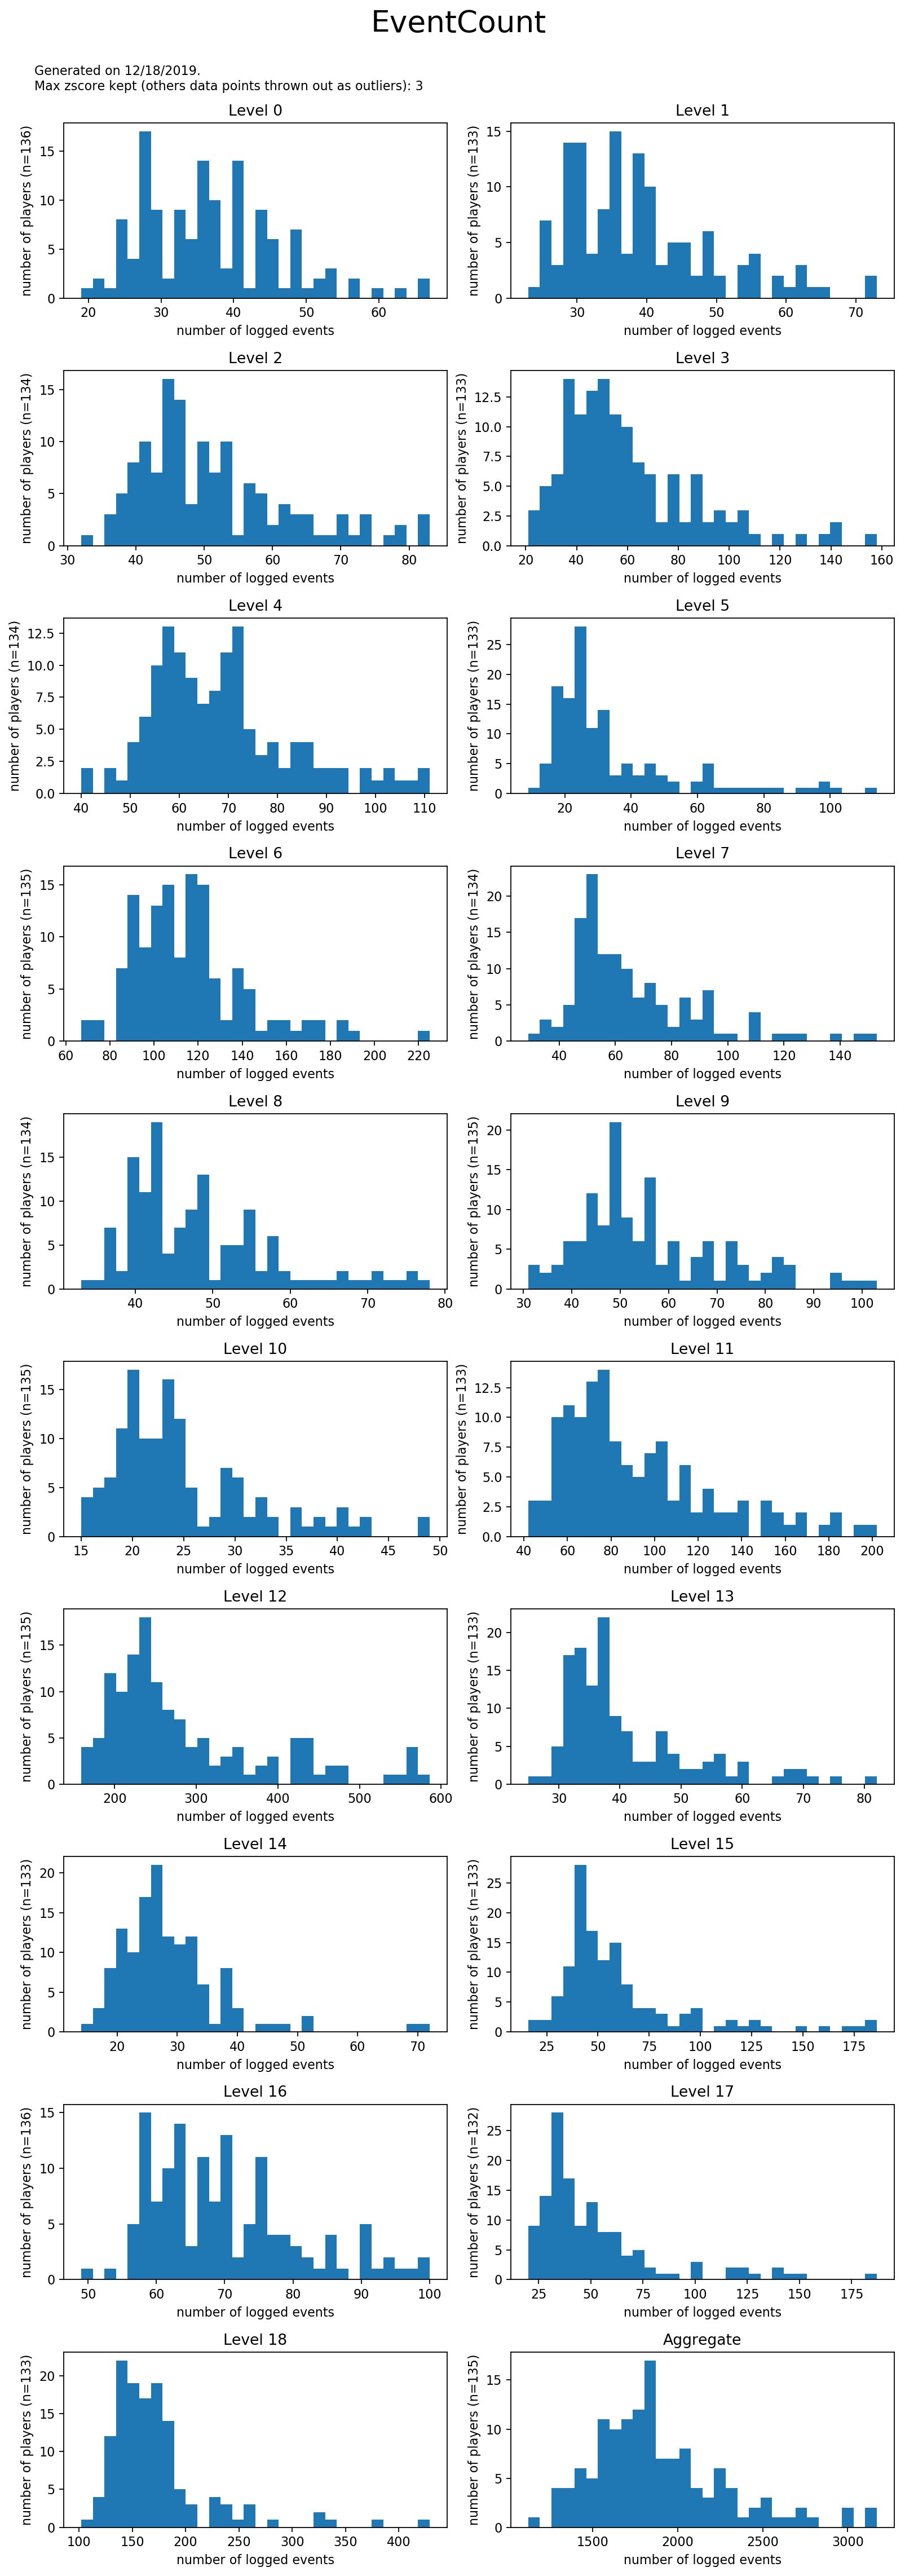

In [64]:
output_level_histogram('EventCount','number of logged events')

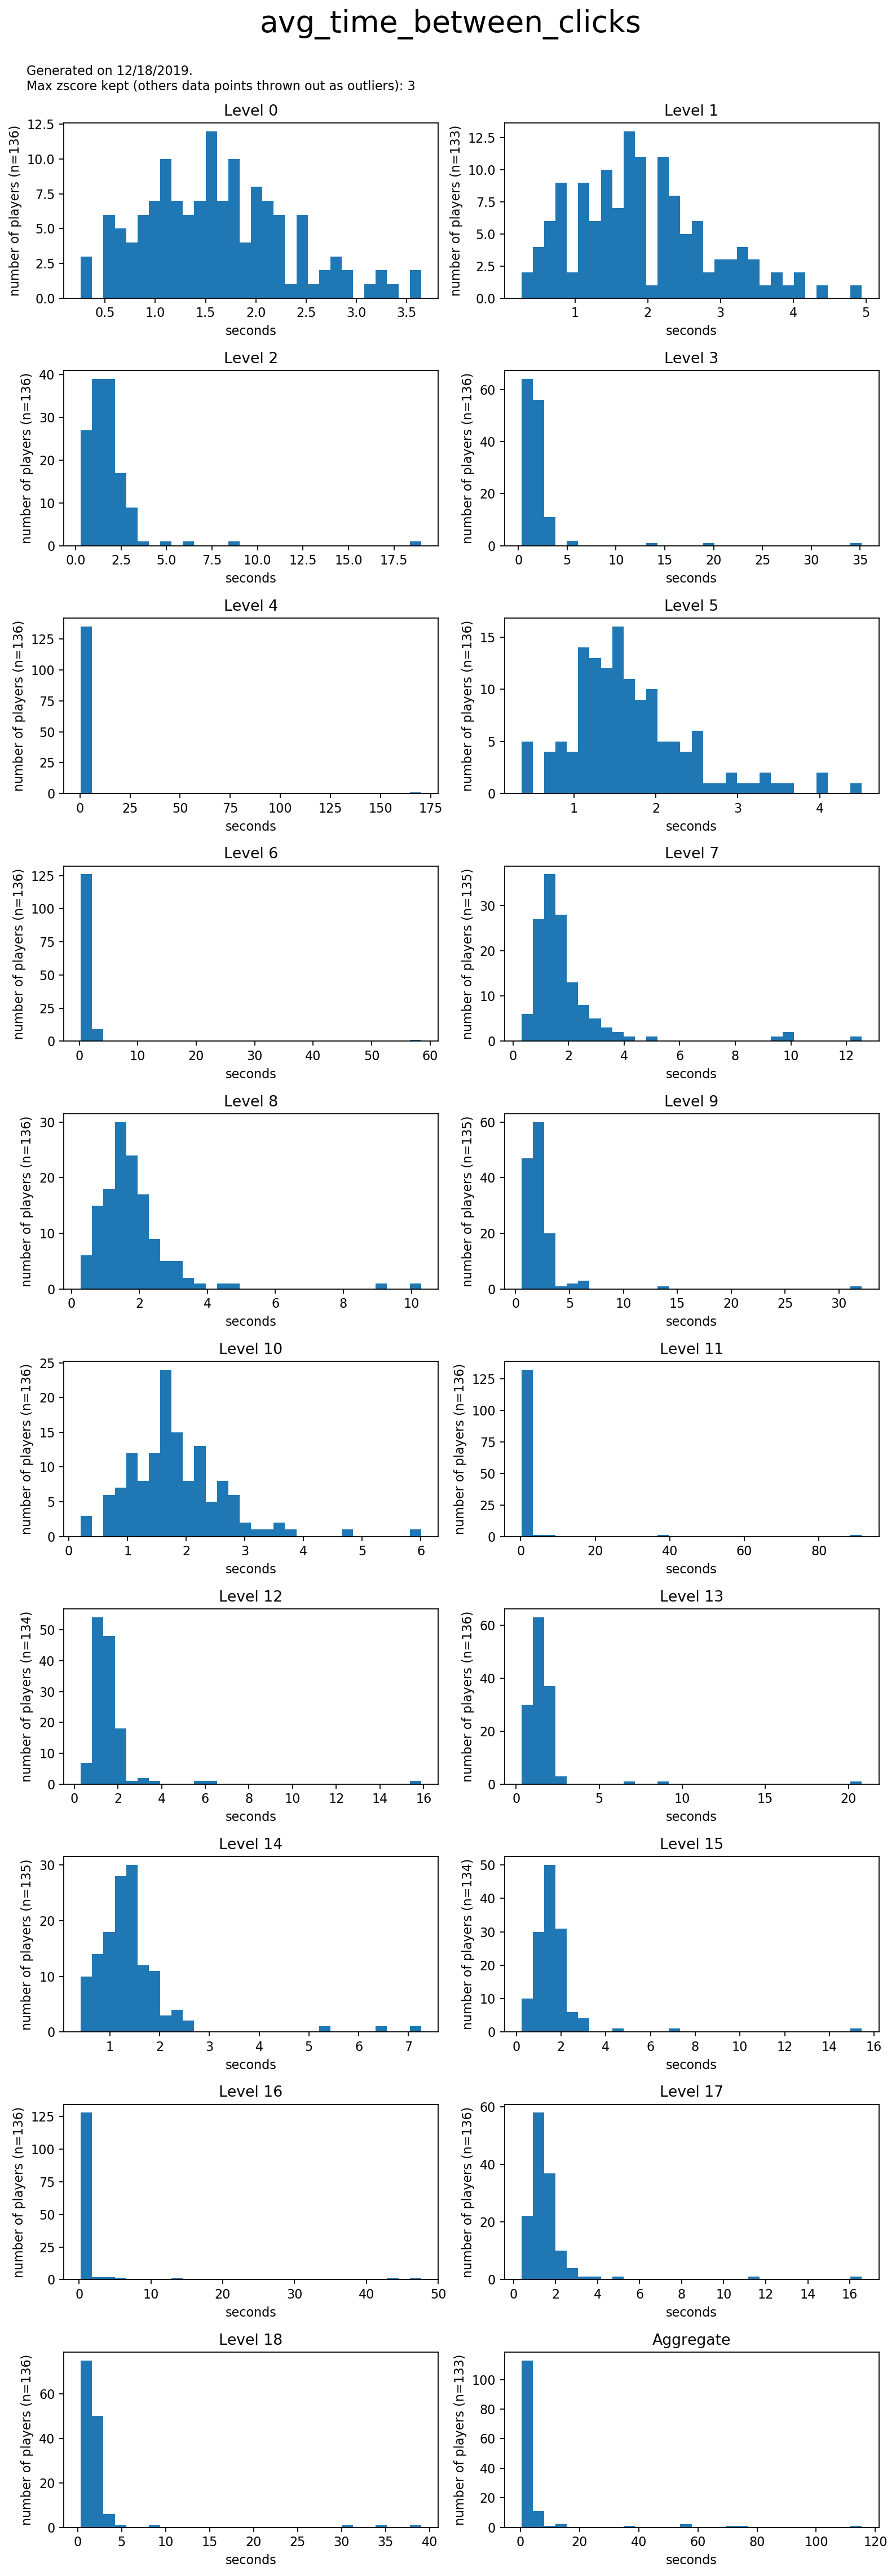

In [65]:
output_level_histogram('avg_time_between_clicks', 'seconds')

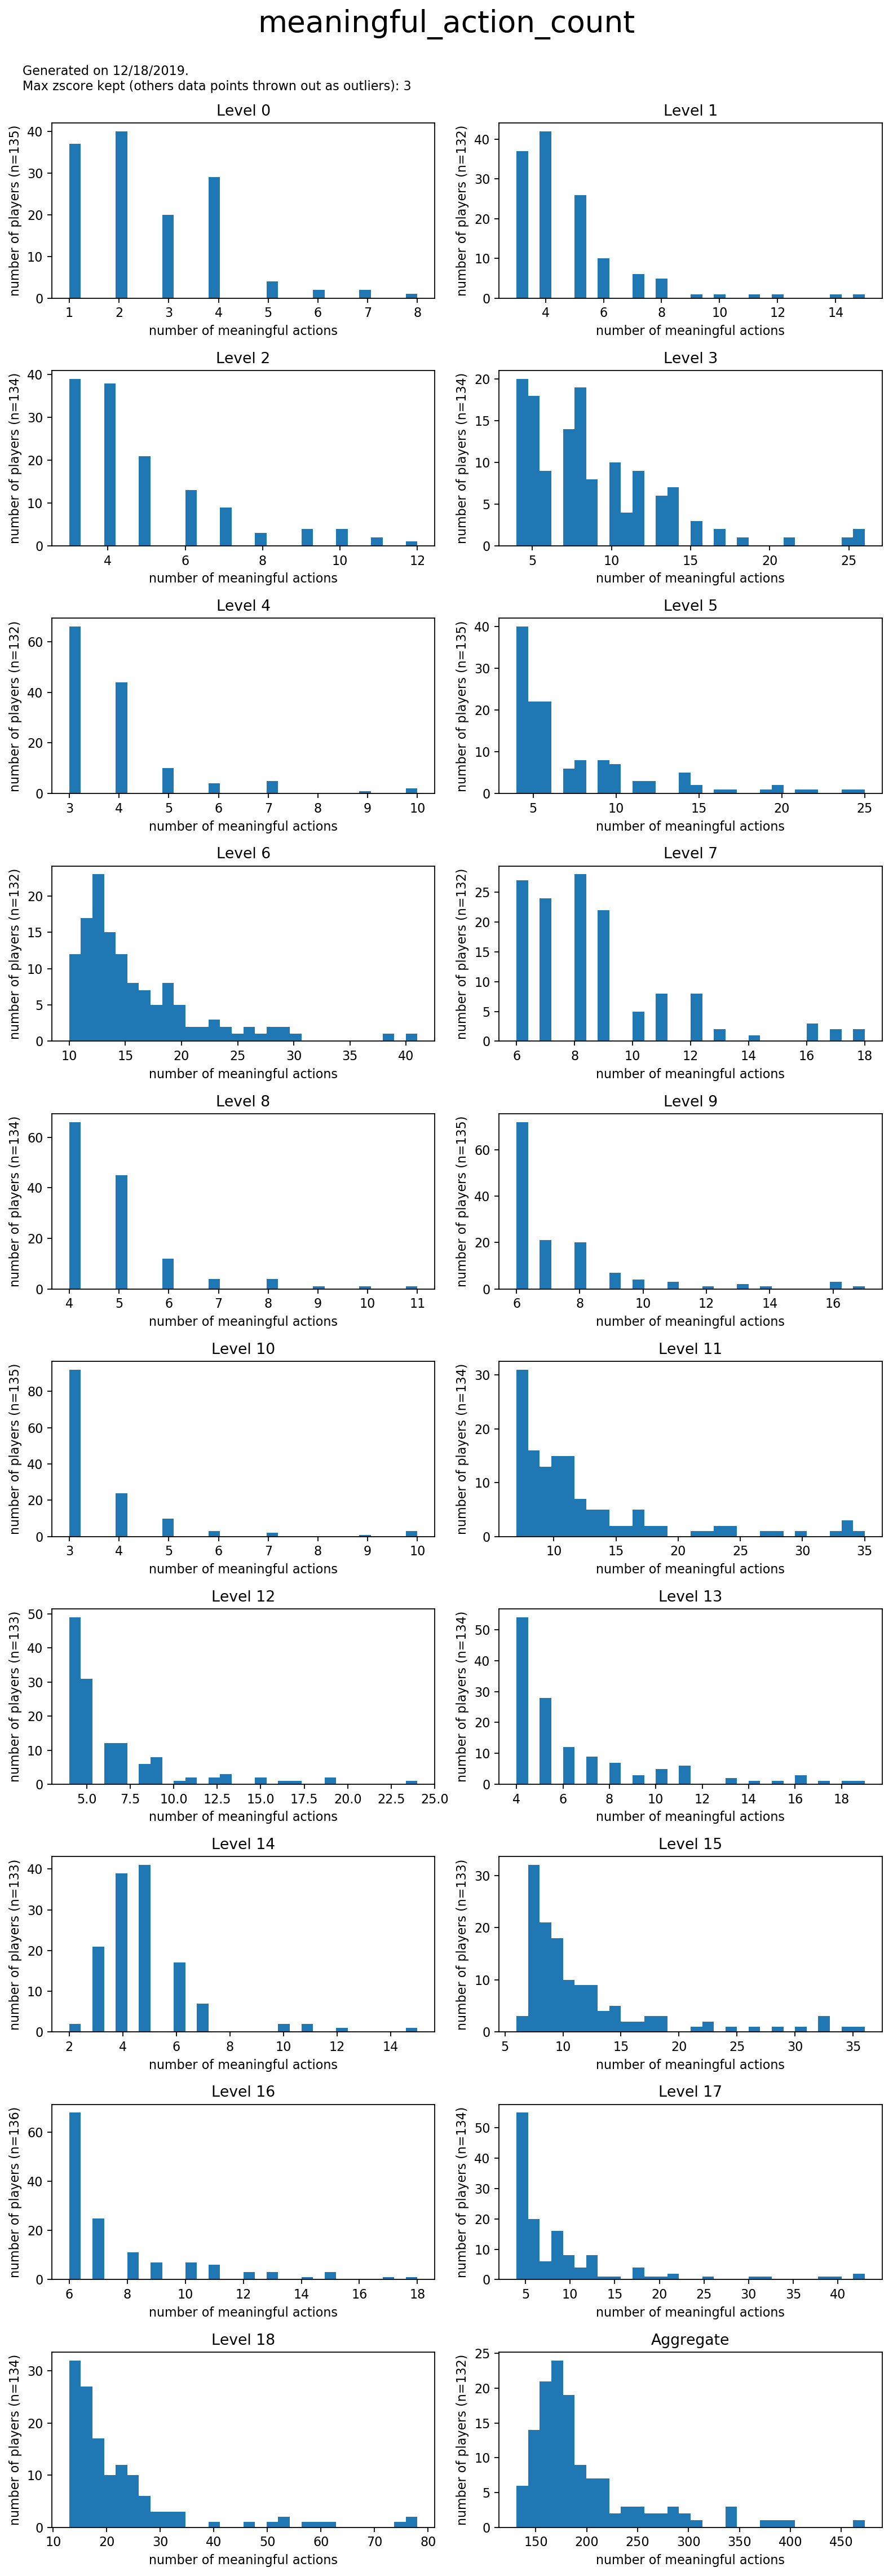

In [66]:
output_level_histogram('meaningful_action_count', 'number of meaningful actions')